In [ ]:
pip install scipy pandas scikit-learn seaborn matplotlib

In [139]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn import metrics
from scipy.spatial.distance import pdist
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [48]:
dataset = pd.read_csv("train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataset.shape

(891, 12)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.2+ KB


In [10]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

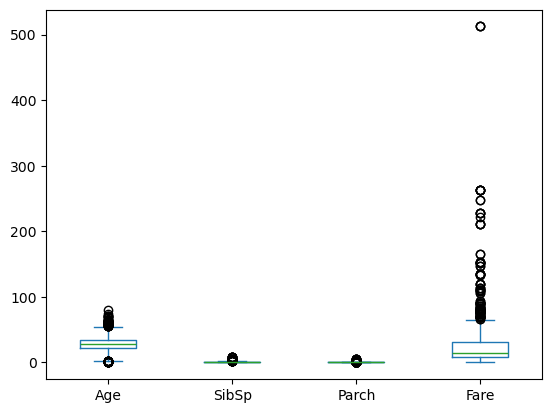

In [52]:
dataset[['Age', 'SibSp', 'Parch', 'Fare']].plot(kind='box')

Se elimina el dato atipico en el la columna Fare

<Axes: >

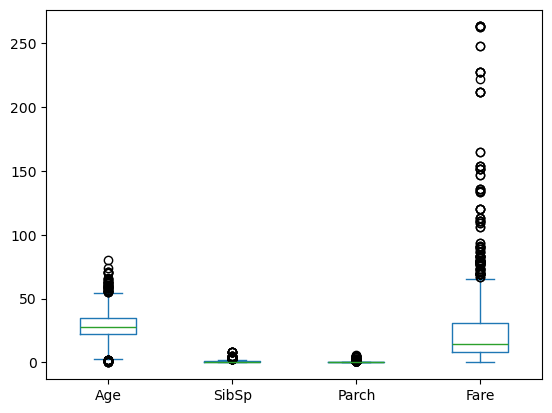

In [54]:
dataset = dataset[dataset["Fare"]<=400]
dataset[['Age', 'SibSp', 'Parch', 'Fare']].plot(kind='box')

In [56]:
dataset["Sex"].value_counts()

Sex
male      575
female    313
Name: count, dtype: int64

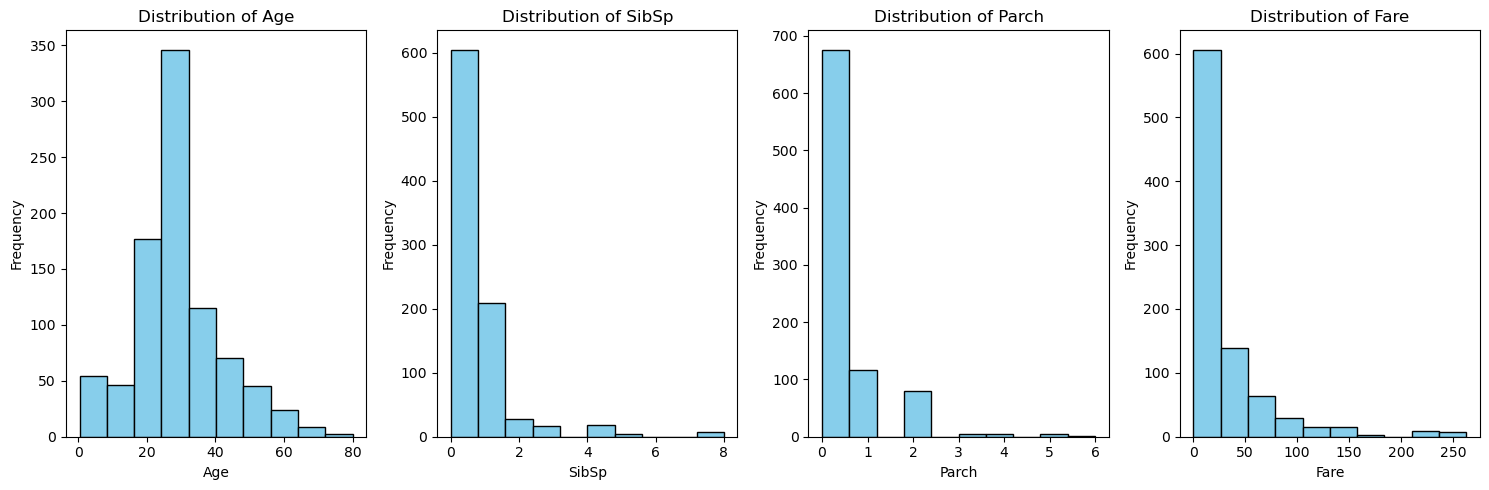

In [58]:
# Generación de histogramas para cada columna numérica
plt.figure(figsize=(15, 5))
for i, column in enumerate(['Age', 'SibSp', 'Parch', 'Fare'], 1):
    plt.subplot(1, 4, i)  # Crear subplots en una sola fila
    plt.hist(dataset[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

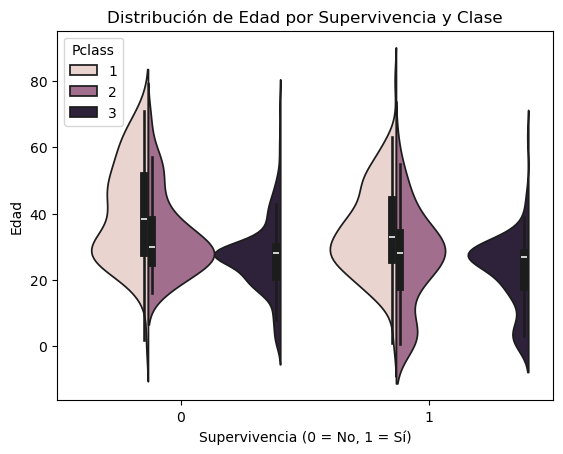

In [60]:
sns.violinplot(data=dataset, x='Survived', y='Age', hue='Pclass', split=True)
plt.title('Distribución de Edad por Supervivencia y Clase')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Edad')
plt.show()

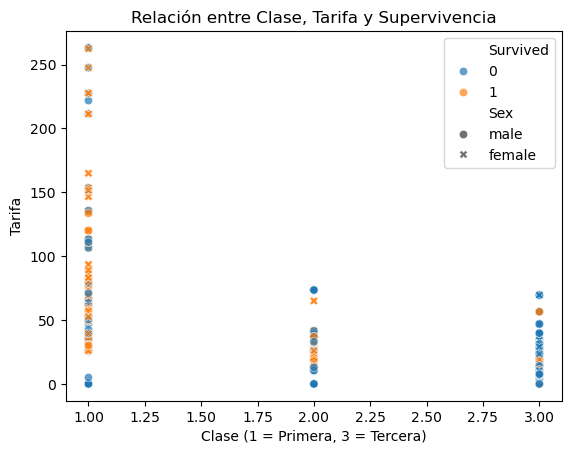

In [62]:
# Scatterplot: Tarifa vs Clase, coloreado por Supervivencia
sns.scatterplot(data=dataset, x='Pclass', y='Fare', hue='Survived', style='Sex', alpha=0.7)
plt.title('Relación entre Clase, Tarifa y Supervivencia')
plt.xlabel('Clase (1 = Primera, 3 = Tercera)')
plt.ylabel('Tarifa')
plt.show()

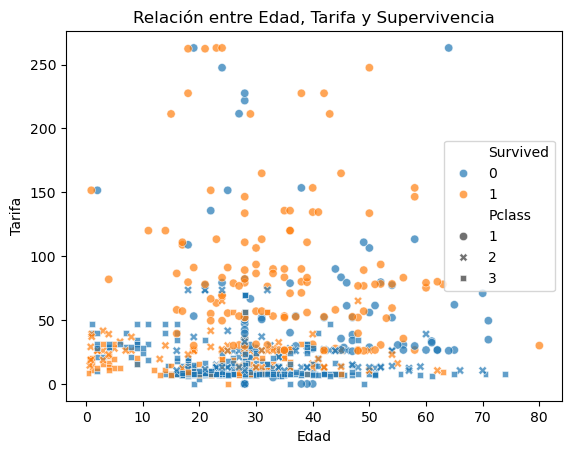

In [64]:
sns.scatterplot(data=dataset, x='Age', y='Fare', hue='Survived', style='Pclass', alpha=0.7)
plt.title('Relación entre Edad, Tarifa y Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

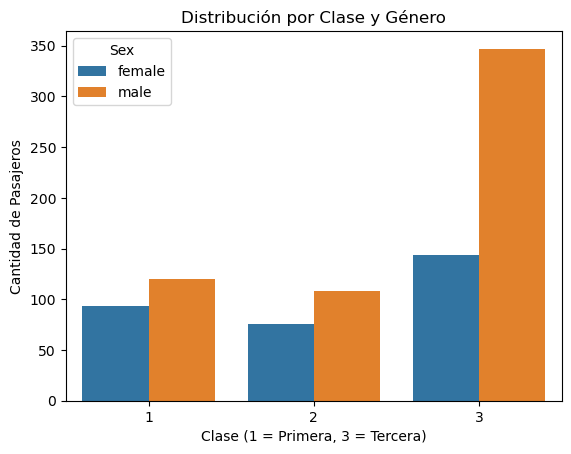

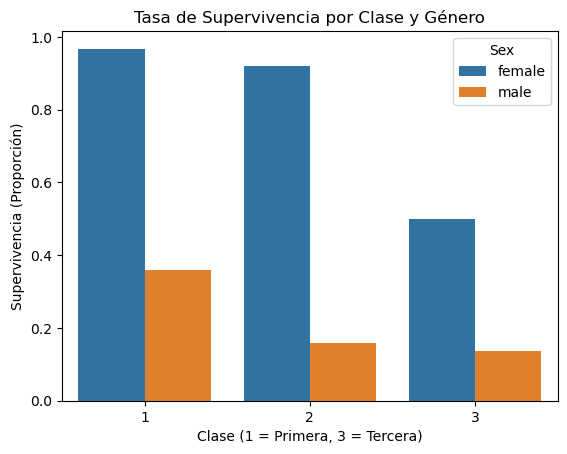

In [66]:
sns.countplot(data=dataset, x='Pclass', hue='Sex')
plt.title('Distribución por Clase y Género')
plt.xlabel('Clase (1 = Primera, 3 = Tercera)')
plt.ylabel('Cantidad de Pasajeros')
plt.show()

sns.barplot(data=dataset, x='Pclass', y='Survived', hue='Sex', ci=None)
plt.title('Tasa de Supervivencia por Clase y Género')
plt.xlabel('Clase (1 = Primera, 3 = Tercera)')
plt.ylabel('Supervivencia (Proporción)')
plt.show()

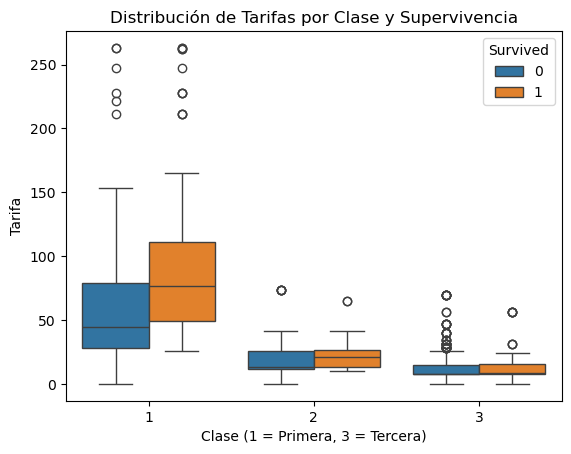

In [68]:
sns.boxplot(data=dataset, x='Pclass', y='Fare', hue='Survived')
plt.title('Distribución de Tarifas por Clase y Supervivencia')
plt.xlabel('Clase (1 = Primera, 3 = Tercera)')
plt.ylabel('Tarifa')
plt.show()

# Modelo con Arbol de desicion
## Se obtienen los datos de entrenamiento y de pruebas

In [123]:
x_train = dataset.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
y_train = dataset["Survived"]
x_train = x_train.drop(columns=["Survived"])

# se codifican las columnas categoricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    x_train[column] = le.fit_transform(x_train[column])
    label_encoders[column] = le

# se obtiene los datos de test
x_test = pd.read_csv("test.csv")
x_test = x_test.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
# se completan los datos nulos del archivo test.csv
x_test['Age'].fillna(dataset['Age'].median(), inplace=True)
x_test['Fare'].fillna(dataset['Fare'].median(), inplace=True)

for column in ['Sex', 'Embarked']:
    x_test[column] = label_encoders[column].transform(x_test[column])


y_test = pd.read_csv("gender_submission.csv")["Survived"]
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


## Se entrena el modelo descision tree y se evalua el modelo

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       266
           1       0.73      0.77      0.75       152

    accuracy                           0.81       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.82      0.81      0.81       418



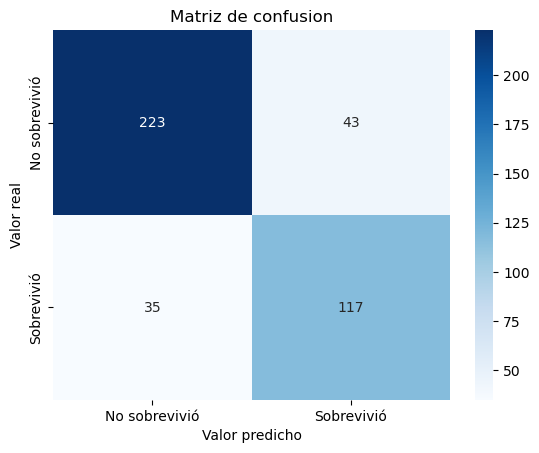

In [161]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)

report = classification_report(y_test, y_pred)

# Imprimir el reporte
print(report)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivió", "Sobrevivió"], yticklabels=["No sobrevivió", "Sobrevivió"])
plt.ylabel("Valor real")
plt.xlabel("Valor predicho")
plt.title("Matriz de confusion")
plt.show()